Data import and analysis

In [2]:
#### Importing the necessary libraries
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as st
from scipy.stats import kstest 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#### Importing files
cust = pd.read_csv('customers.csv', sep=";")
prod = pd.read_csv('products.csv', sep=";")
transa = pd.read_csv('Transactions.csv', sep=";")

In [3]:
# File containing information about the id, sex and date of birth of customers

In [4]:
cust.info()
cust.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [5]:
# File containing the id, price and category of the various products

In [6]:
prod.info()
prod.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [7]:
# File containing product id, transaction date, session id and customer id

In [8]:
transa.info()
transa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687534 non-null  object
 1   date        687534 non-null  object
 2   session_id  687534 non-null  object
 3   client_id   687534 non-null  object
dtypes: object(4)
memory usage: 21.0+ MB


,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [9]:
# Observing the uniqueness of different tables

In [10]:
unix = cust.nunique()
unixe = prod.nunique()
unixy = transa.nunique()
print(unix)

client_id    8621
sex             2
birth          76
dtype: int64


In [11]:
print(unixe)

id_prod    3286
price      1454
categ         3
dtype: int64


In [12]:
print(unixy)

id_prod         3265
date          687419
session_id    345505
client_id       8600
dtype: int64


Obtaining the age of customers

In [13]:
annee_n = dt.datetime.now().year
cust['age']= annee_n - cust['birth']
cust

,client_id,sex,birth,age
0,c_4410,f,1967,58
1,c_7839,f,1975,50
2,c_1699,f,1984,41
3,c_5961,f,1962,63
4,c_5320,m,1943,82
...,...,...,...,...
8616,c_7920,m,1956,69
8617,c_7403,f,1970,55
8618,c_5119,m,1974,51
8619,c_5643,f,1968,57


I - Uni/bivariate analysis for data interpretation

1 - Pieplot price/category

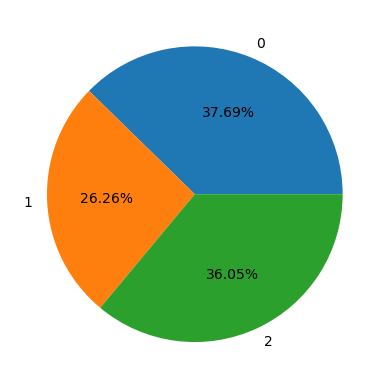

In [14]:
categ = prod.groupby('categ')['price'].sum()
categ=categ.reset_index()

categ_c = plt.pie(x=categ['price'], labels=categ['categ'], autopct='%.2f%%')

2 - Boxplot price/category

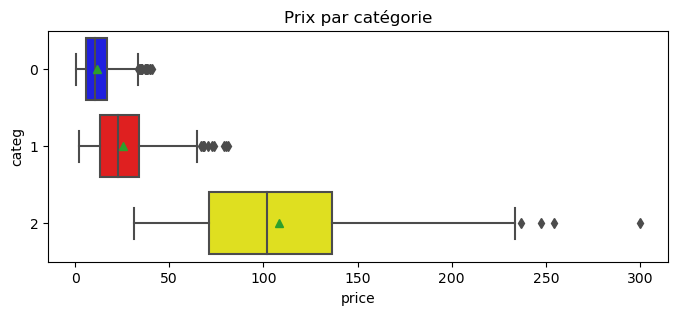

In [15]:
plt.figure(figsize=(8,3))
sns.boxplot(data=prod, y='categ', x='price', orient='h', showfliers=True, showmeans=True, palette=['blue', 'red', 'yellow'])
plt.title('Prix par catégorie')
plt.show()

3 - Pieplot sex

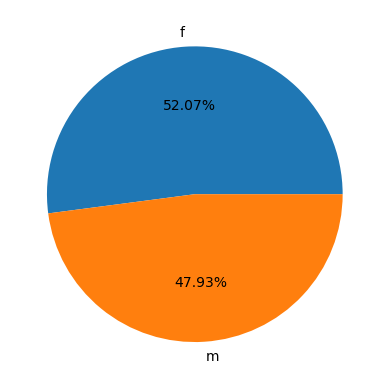

In [16]:
sex = cust.groupby('sex')['birth'].sum()
sex = sex.reset_index()
sex

sex_c = plt.pie(x=sex['birth'], labels=sex['sex'], autopct='%.2f%%')

4 - Histogram of ages

(array([1445., 1128., 1357., 1264., 1245.,  806.,  798.,  317.,  203.,
          58.]),
 array([21. , 28.5, 36. , 43.5, 51. , 58.5, 66. , 73.5, 81. , 88.5, 96. ]),
 <BarContainer object of 10 artists>)

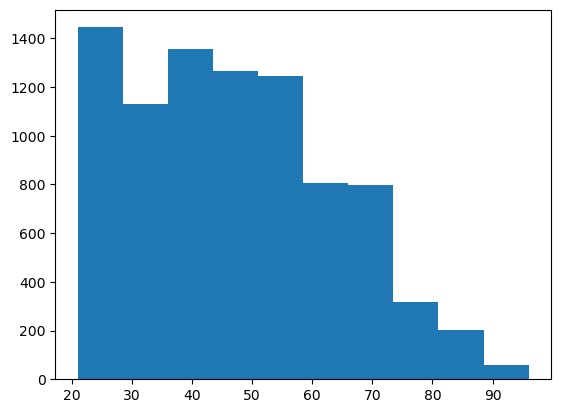

In [17]:
plt.hist(cust['age'])

II - Time series analysis

1 - Joints

In [18]:
data = transa.merge(cust, how='left', on='client_id').merge(prod, how='left', on='id_prod')
data

,id_prod,date,session_id,client_id,sex,birth,age,price,categ
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,58,11.99,0
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,65,19.37,0
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,37,4.50,0
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,36,6.55,0
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,69,16.49,0
...,...,...,...,...,...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996,29,21.92,1
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994,31,48.99,2
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985,40,26.99,1
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953,72,8.99,0


2 - Change of date format for data exploitation

In [19]:
# Identification of a problematic temporality

In [20]:
cole = data.loc[198325, :]
cole

id_prod                            1_400
date          2021-10-02 24:04:58.422464
session_id                      s_107311
client_id                         c_2513
sex                                    m
birth                               1981
age                                   44
price                               16.6
categ                                  1
Name: 198325, dtype: object

In [21]:
print("The date begins  ", data['date'].min()," and ends ", data['date'].max())

The date begins   2021-03-01 00:01:07.843138  and ends  2023-02-28 23:58:30.792755


In [22]:
# Conversion to datetime


data[['Date', 'Time']] = data['date'].str.split(expand=True)

# Using timedelta
data.Date = pd.to_datetime(data.Date)
data.Time = pd.to_timedelta(data.Time)

# Time correction
data['datetime'] = data.Date + data.Time
data = data.drop(['Date', 'Time'], axis=1)

print(data)
print(data.dtypes)

       id_prod                        date session_id client_id sex  birth  \
0       0_1259  2021-03-01 00:01:07.843138        s_1     c_329   f   1967   
1       0_1390  2021-03-01 00:02:26.047414        s_2     c_664   m   1960   
2       0_1352  2021-03-01 00:02:38.311413        s_3     c_580   m   1988   
3       0_1458  2021-03-01 00:04:54.559692        s_4    c_7912   f   1989   
4       0_1358  2021-03-01 00:05:18.801198        s_5    c_2033   f   1956   
...        ...                         ...        ...       ...  ..    ...   
687529   1_508  2023-02-28 23:49:03.148402   s_348444    c_3573   f   1996   
687530    2_37  2023-02-28 23:51:29.318531   s_348445      c_50   f   1994   
687531   1_695  2023-02-28 23:53:18.929676   s_348446     c_488   f   1985   
687532  0_1547  2023-02-28 23:58:00.107815   s_348447    c_4848   m   1953   
687533  0_1398  2023-02-28 23:58:30.792755   s_348435    c_3575   f   1981   

        age  price  categ                   datetime  
0       

In [23]:
# Two date formats, one of which is usable

In [24]:
fole = data.loc[198325, :]
fole

id_prod                            1_400
date          2021-10-02 24:04:58.422464
session_id                      s_107311
client_id                         c_2513
sex                                    m
birth                               1981
age                                   44
price                               16.6
categ                                  1
datetime      2021-10-03 00:04:58.422464
Name: 198325, dtype: object

3 - Adding year-month and day

In [25]:
data['année_mois'] = data['datetime'].dt.strftime('%Y-%m')

In [26]:
data['jour'] = data['datetime'].dt.strftime('%d')

In [27]:
data

,id_prod,date,session_id,client_id,sex,birth,age,price,categ,datetime,année_mois,jour
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,58,11.99,0,2021-03-01 00:01:07.843138,2021-03,01
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,65,19.37,0,2021-03-01 00:02:26.047414,2021-03,01
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,37,4.50,0,2021-03-01 00:02:38.311413,2021-03,01
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,36,6.55,0,2021-03-01 00:04:54.559692,2021-03,01
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,69,16.49,0,2021-03-01 00:05:18.801198,2021-03,01
...,...,...,...,...,...,...,...,...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996,29,21.92,1,2023-02-28 23:49:03.148402,2023-02,28
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994,31,48.99,2,2023-02-28 23:51:29.318531,2023-02,28
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985,40,26.99,1,2023-02-28 23:53:18.929676,2023-02,28
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953,72,8.99,0,2023-02-28 23:58:00.107815,2023-02,28


In [28]:
print(data.nunique())

id_prod         3265
date          687419
session_id    345505
client_id       8600
sex                2
birth             76
age               76
price           1442
categ              3
datetime      687415
année_mois        24
jour              31
dtype: int64


5 - Curves on the evolution of turnover

In [29]:
ca_global = data.groupby('année_mois').agg({'price':sum}).reset_index()

Text(0.5, 1.0, 'Sales figures by year-month')

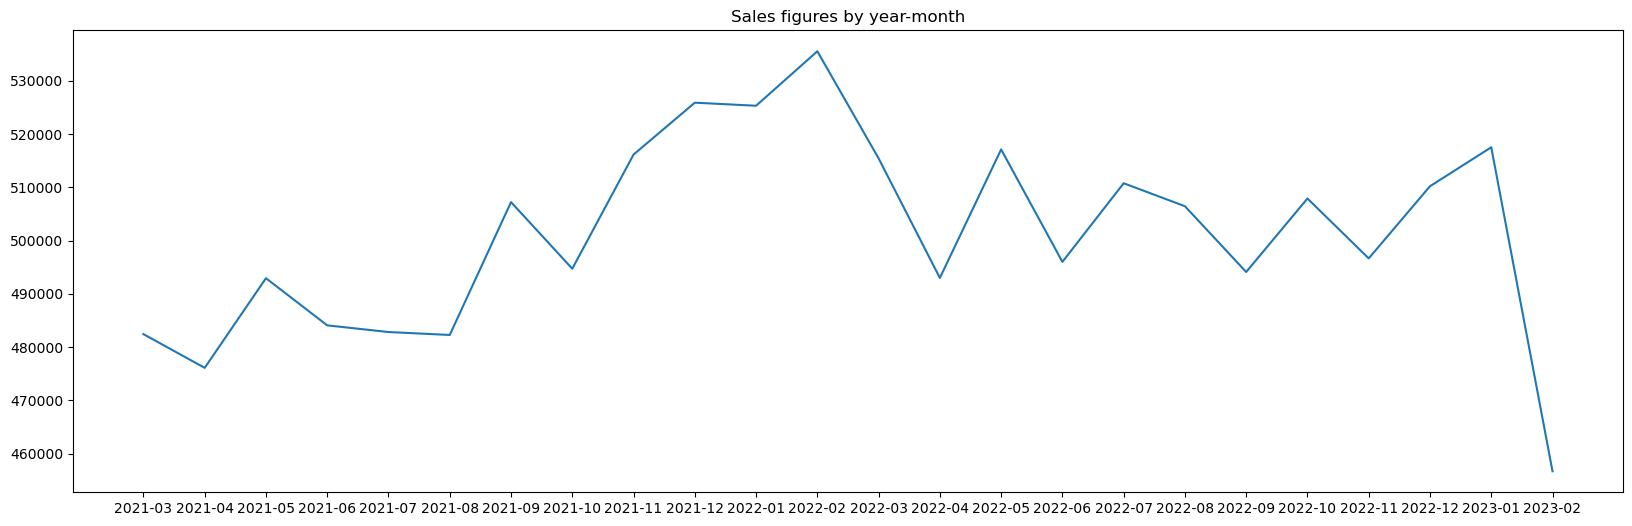

In [131]:
plt.figure(figsize=(20,6))
plt.plot(ca_global['année_mois'], ca_global["price"])
plt.title('Sales figures by year-month')

In [31]:
print(data['price'].sum())

12027663.100000003


In [32]:
ca_global_c = data.groupby(['année_mois','categ']).agg({'price':sum}).reset_index()

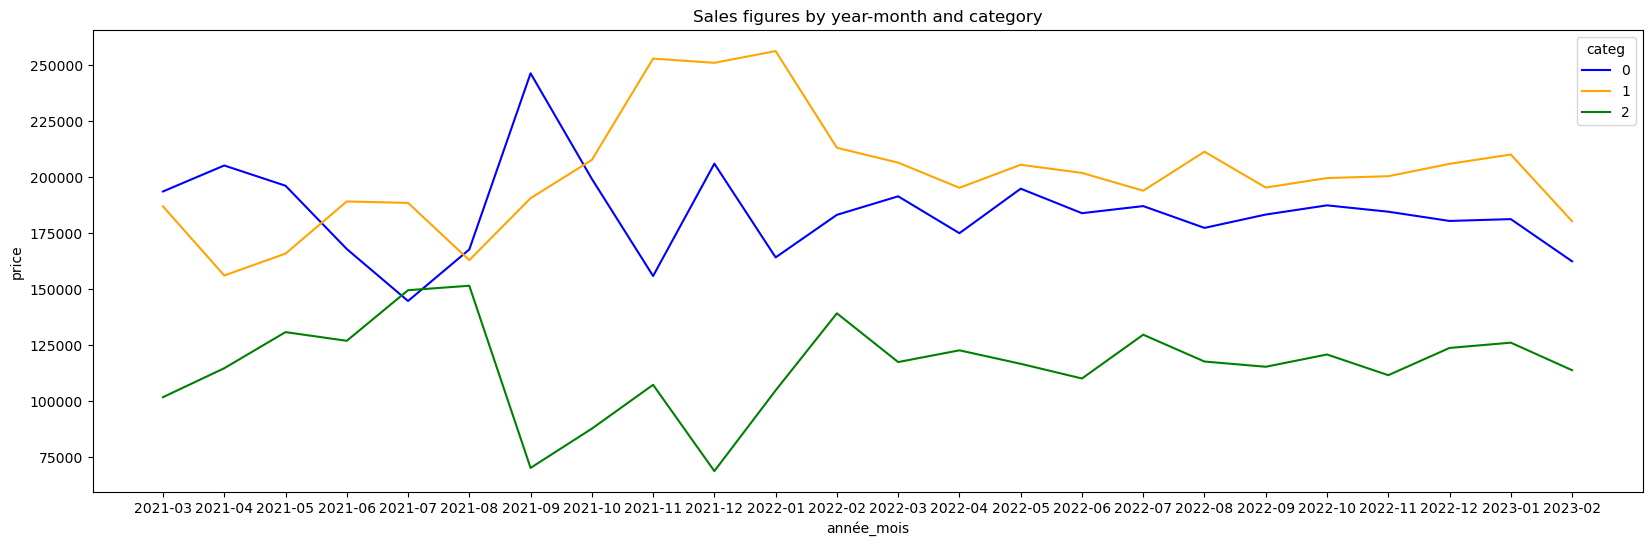

In [132]:
plt.figure(figsize=(20,6))
sns.lineplot(data=ca_global_c, x='année_mois', y='price', hue='categ', palette=['blue','orange','green'])
plt.title('Sales figures by year-month and category')
plt.show()

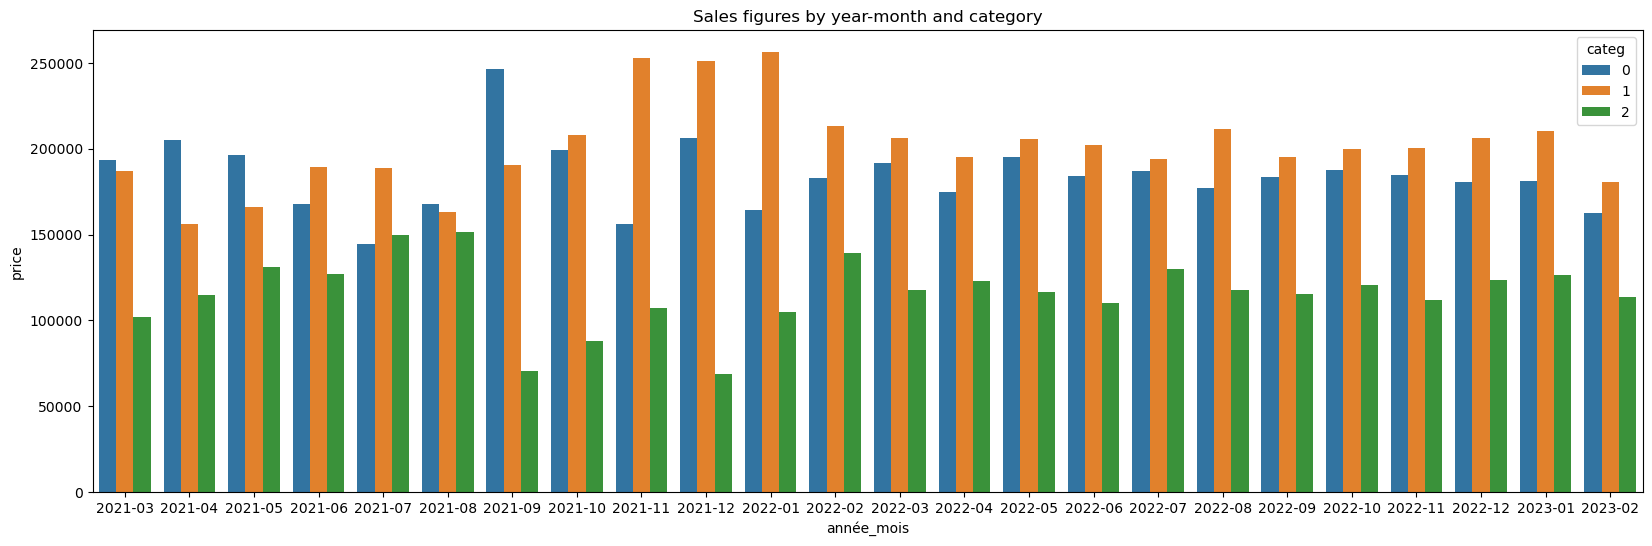

In [133]:
plt.figure(figsize=(20,6))
sns.barplot(data=ca_global_c, x='année_mois', y='price', hue='categ')
plt.title('Sales figures by year-month and category')
plt.show()

In [35]:
ca_global['Moy_mob'] = ca_global['price'].rolling(2).mean()

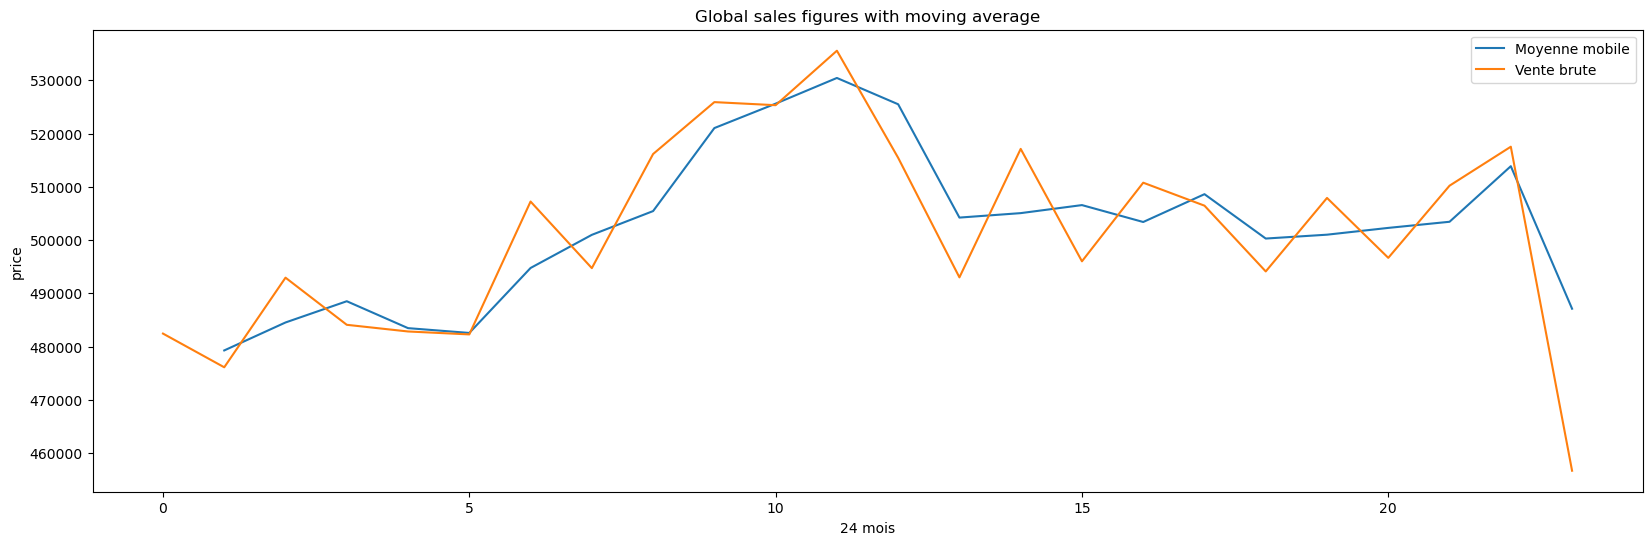

In [134]:
plt.figure(figsize=(20,6))
plt.plot(ca_global['Moy_mob'], label='Moyenne mobile')
plt.plot(ca_global['price'], label='Vente brute')
plt.legend()
plt.title('Global sales figures with moving average')
plt.ylabel('price')
plt.xlabel('24 mois')
plt.show()

In [37]:
saison_ca = data.groupby('année_mois').agg({'price':sum}).reset_index()
saison_ca = saison_ca[saison_ca['année_mois'].str.contains('2022', regex=False)]
saison_ca['Moy_mob'] = saison_ca['price'].rolling(3).mean()

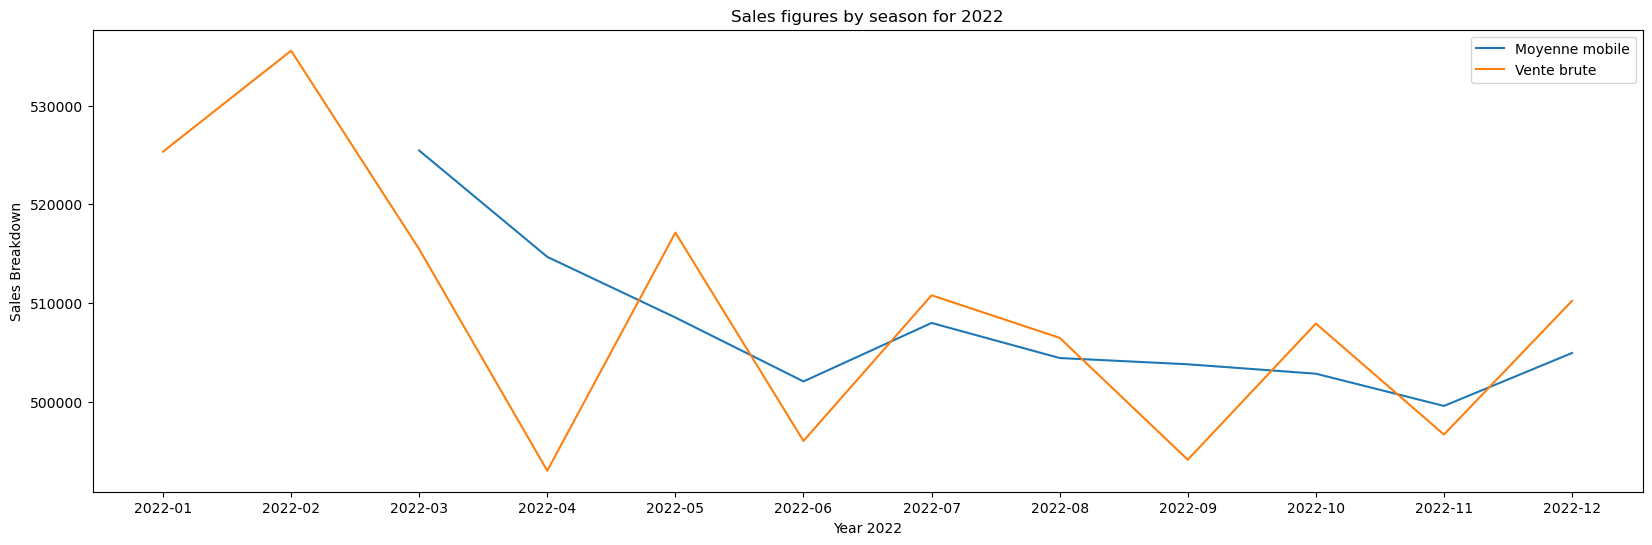

In [135]:
plt.figure(figsize=(20,6))
plt.plot(saison_ca['année_mois'],saison_ca['Moy_mob'], label='Moyenne mobile')
plt.plot(saison_ca['année_mois'],saison_ca['price'], label='Vente brute')
plt.legend()
plt.title('Sales figures by season for 2022')
plt.ylabel("Sales Breakdown")
plt.xlabel('Year 2022')
plt.show()

In [39]:
mois_ca = data[data['année_mois'].str.contains('2022-08', regex=False)]

In [40]:
mois_ca_j = mois_ca.groupby('jour').agg({'price':sum}).reset_index()

In [41]:
mois_ca_j["Moy_mob"]  = mois_ca_j['price'].rolling(2).mean()

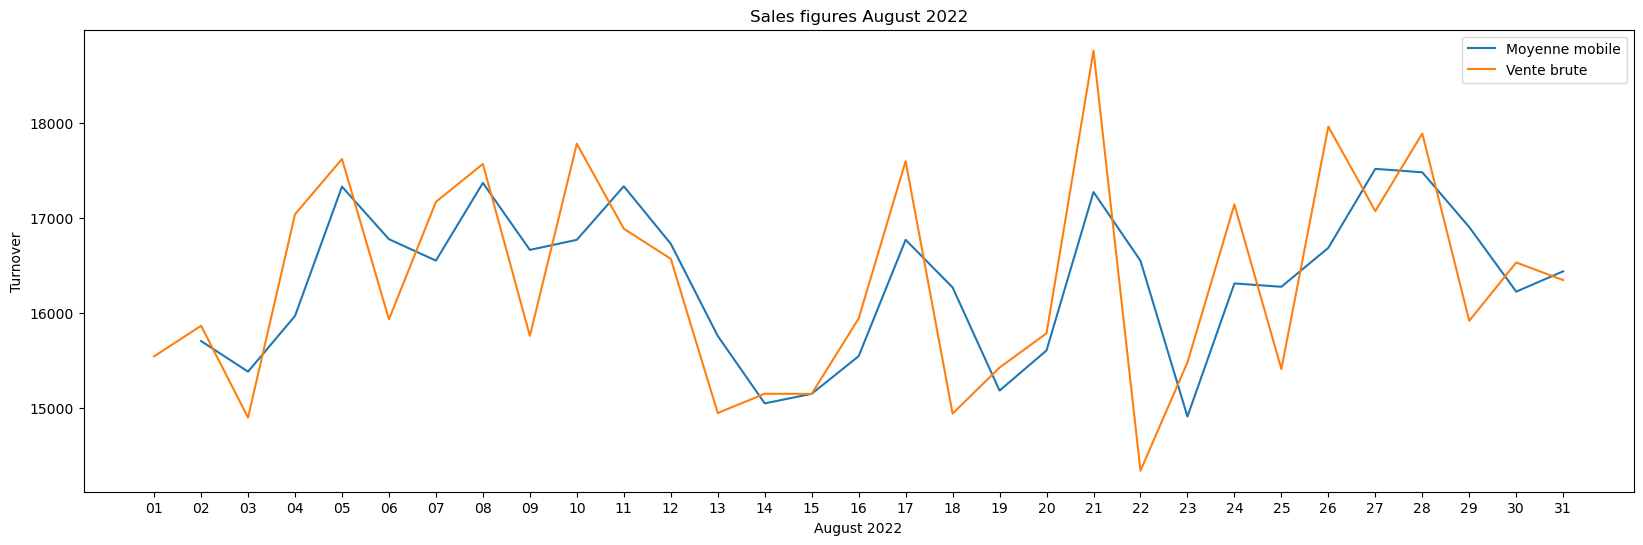

In [136]:
plt.figure(figsize=(20,6))
plt.plot(mois_ca_j['jour'],mois_ca_j['Moy_mob'], label='Moyenne mobile')
plt.plot(mois_ca_j['jour'],mois_ca_j['price'], label='Vente brute')
plt.legend()
plt.title('Sales figures August 2022')
plt.ylabel("Turnover")
plt.xlabel('August 2022')
plt.show()

6 - Top et Flop

In [43]:
# All categories combined

In [44]:
prod_rank = data.groupby('id_prod').size().reset_index(name='counts')

In [45]:
top_rank_prod = prod_rank.sort_values('counts', ascending=False)
top_rank_prod = top_rank_prod.iloc[:10, :]

Text(0.5, 1.0, 'Top Global')

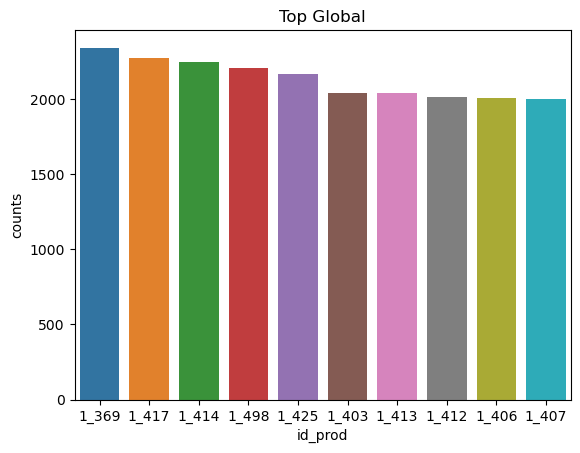

In [46]:
sns.barplot(data=top_rank_prod, x=top_rank_prod['id_prod'], y=top_rank_prod['counts'], errorbar=None)
plt.title('Top Global')

In [47]:
flop_rank_prod = prod_rank.sort_values('counts', ascending=True)
flop_rank_prod = flop_rank_prod.iloc[:10, :]

Text(0.5, 1.0, 'Flop Global')

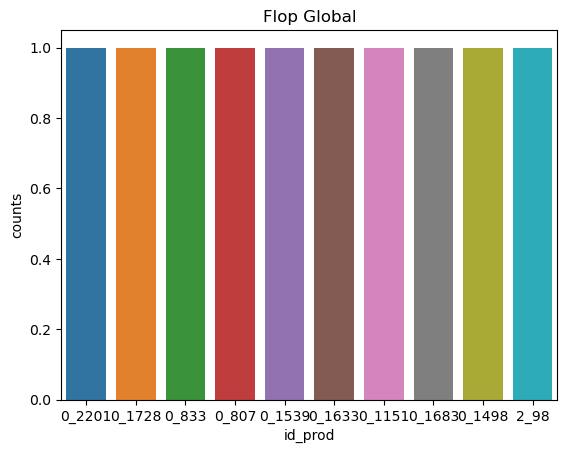

In [48]:
sns.barplot(data=flop_rank_prod, x=flop_rank_prod['id_prod'], y=flop_rank_prod['counts'], errorbar=None)
plt.title('Flop Global')

In [49]:
rank_prod_categ = data.groupby(['id_prod', 'categ']).size().reset_index(name='counts')

In [50]:
top_rank_prod_c = rank_prod_categ.sort_values('counts', ascending=False)
top_rank_prod_c = top_rank_prod_c.groupby('categ').head(10)

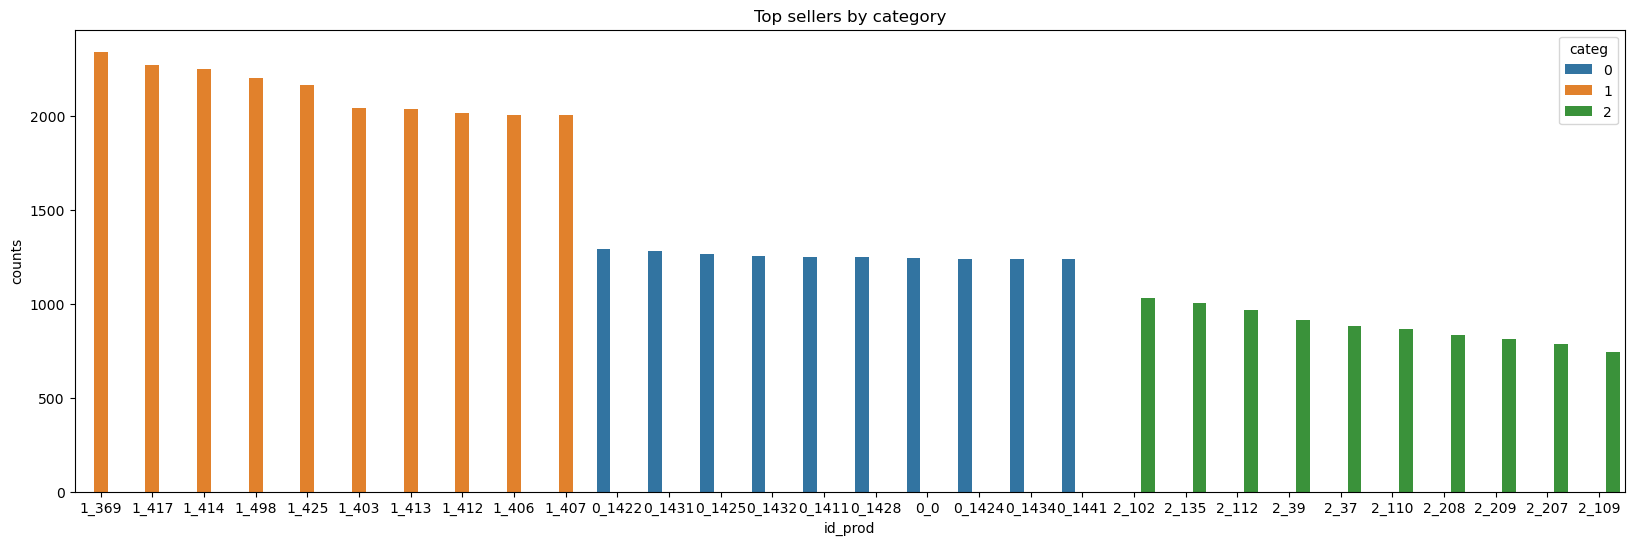

In [137]:
plt.figure(figsize=(20,6))
sns.barplot(data=top_rank_prod_c, x='id_prod', y='counts', hue='categ')
plt.title('Top sellers by category')
plt.show()

In [52]:
flop_rank_prod_c = rank_prod_categ.sort_values('counts', ascending=False)
flop_rank_prod_c = flop_rank_prod_c.groupby('categ').tail(10)
flop_rank_prod_c = flop_rank_prod_c.sort_values('categ', ascending=True)

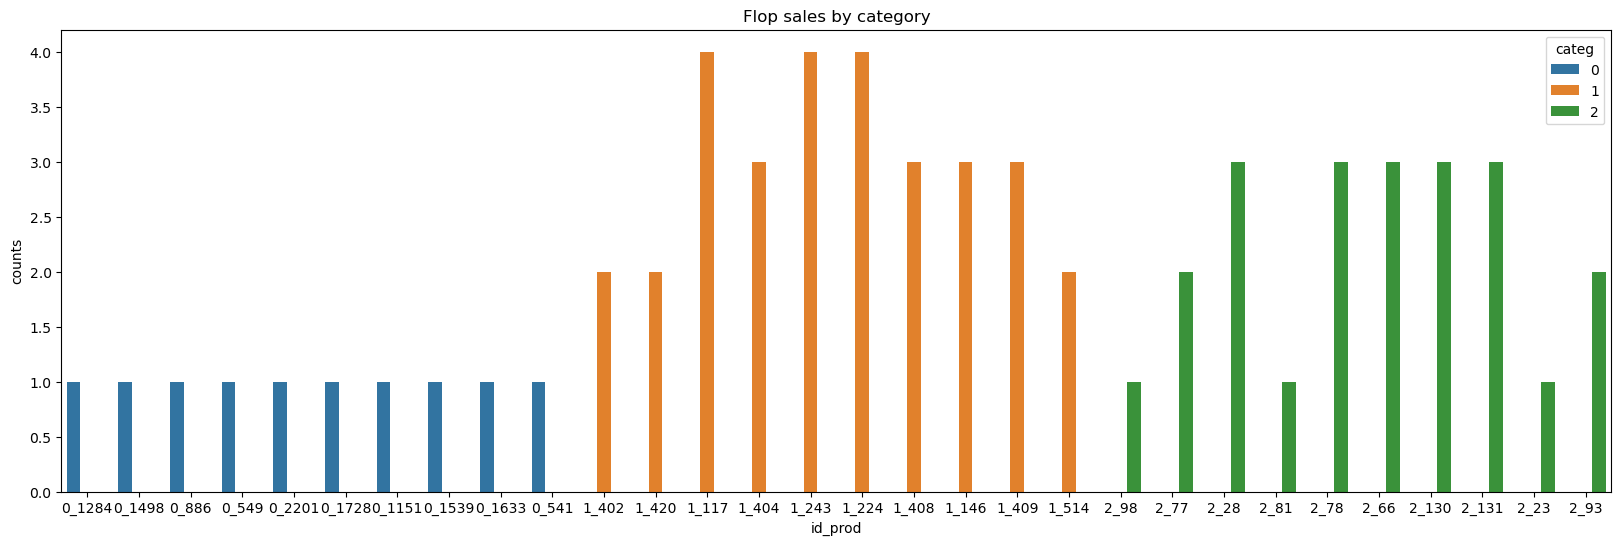

In [138]:
plt.figure(figsize=(20,6))
sns.barplot(data=flop_rank_prod_c, x='id_prod', y='counts', hue='categ')
plt.title('Flop sales by category')
plt.show()

7 - Lorenz and pro client

In [54]:
#Table containing the customer ID and the turnover achieved from largest to smallest

In [55]:
fidele = data.groupby('client_id').agg({'price':sum}).reset_index()
fidele = fidele.sort_values('price', ascending=False)

In [56]:
#Lorenz with Gini index

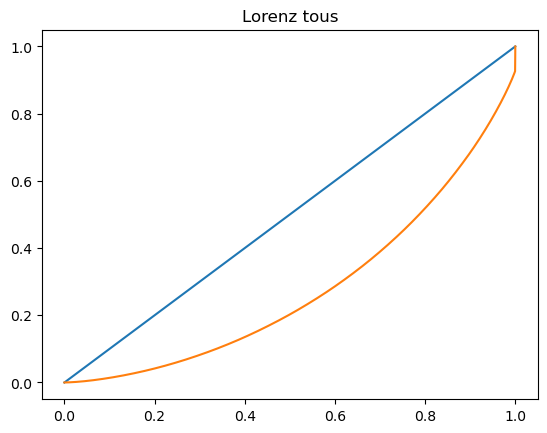

In [57]:
depenses = fidele[fidele['price'] > 0]
dep = depenses['price'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) 

xaxis = np.linspace(0-1/n,1+1/n,n+1) 
maxis = np.linspace(0,1,1+1)
plt.plot(maxis)
plt.title('Lorenz tous')
plt.plot(xaxis,lorenz)
plt.show()

In [58]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
S = 0.5 - AUC 
gini = 2*S
gini

0.44189587995615665

In [59]:
# Moderately equal distribution but the end of the curve shows a peculiarity that we will try to explain

In [60]:
#Identification of professional clients

client_pro = fidele.iloc[0:4,:]
client_pro

,client_id,price
677,c_1609,326039.89
4388,c_4958,290227.03
6337,c_6714,153918.60
2724,c_3454,114110.57


In [61]:
iso_c_pro = data.loc[data['client_id'].isin(client_pro['client_id'])]
iso_c_pro

,id_prod,date,session_id,client_id,sex,birth,age,price,categ,datetime,année_mois,jour
6,0_1304,2021-03-01 00:07:04.371179,s_7,c_1609,m,1980,45,5.86,0,2021-03-01 00:07:04.371179,2021-03,01
13,0_1159,2021-03-01 00:11:57.832228,s_7,c_1609,m,1980,45,7.99,0,2021-03-01 00:11:57.832228,2021-03,01
50,0_1431,2021-03-01 01:08:49.803921,s_33,c_3454,m,1969,56,10.99,0,2021-03-01 01:08:49.803921,2021-03,01
78,0_1425,2021-03-01 01:56:41.944044,s_46,c_1609,m,1980,45,12.99,0,2021-03-01 01:56:41.944044,2021-03,01
88,0_1469,2021-03-01 02:12:21.294004,s_53,c_1609,m,1980,45,14.99,0,2021-03-01 02:12:21.294004,2021-03,01
...,...,...,...,...,...,...,...,...,...,...,...,...
687482,0_1333,2023-02-28 22:40:24.405750,s_348416,c_6714,f,1968,57,5.99,0,2023-02-28 22:40:24.405750,2023-02,28
687494,1_392,2023-02-28 23:04:51.081903,s_348416,c_6714,f,1968,57,18.11,1,2023-02-28 23:04:51.081903,2023-02,28
687496,2_13,2023-02-28 23:08:40.035146,s_348403,c_4958,m,1999,26,50.99,2,2023-02-28 23:08:40.035146,2023-02,28
687498,1_183,2023-02-28 23:10:49.235323,s_348416,c_6714,f,1968,57,24.99,1,2023-02-28 23:10:49.235323,2023-02,28


In [62]:
#The age of the different pro clients + their ID

In [63]:
print(iso_c_pro.age.unique(),iso_c_pro.client_id.unique()) 

[45 56 26 57] ['c_1609' 'c_3454' 'c_4958' 'c_6714']


In [64]:
# Identification of ordinary customers

fidele_t = fidele.iloc[4:8600,:]

In [65]:
#Lorenz and Gini without the pro clients

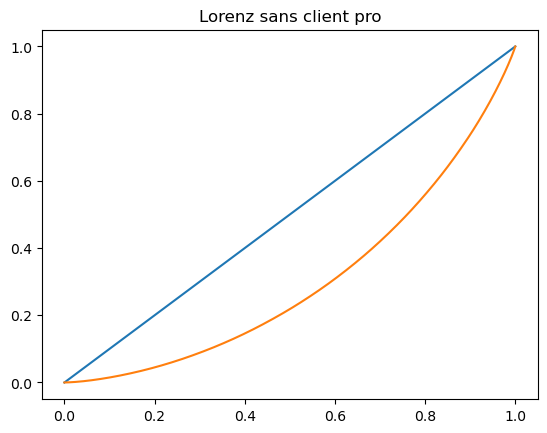

In [66]:
depenses_t = fidele_t[fidele_t['price'] > 0]
dep_t = depenses_t['price'].values
n_t = len(dep_t)
lorenz_t = np.cumsum(np.sort(dep_t)) / dep_t.sum()
lorenz_t = np.append([0],lorenz_t) 

xaxis_t = np.linspace(0-1/n_t,1+1/n_t,n_t+1) 
plt.plot(maxis)
plt.title('Lorenz sans client pro')
plt.plot(xaxis_t,lorenz_t)
plt.show()

In [67]:
AUC_t = (lorenz_t.sum() -lorenz_t[-1]/2 -lorenz_t[0]/2)/n_t 
S_t = 0.5 - AUC_t 
gini_t = 2*S_t
gini_t

0.39828603507456595

In [68]:
# We note that by excluding professional customers the Gini index is even more egalitarian

III - Statistical test

1 - Two qualitative variables khi2

In [69]:
#Gender/category correlation with chi-2 test

genrer_categ = data.groupby(['sex', 'categ']).size().reset_index(name='counts')
genrer_categ

,sex,categ,counts
0,f,0,206103
1,f,1,119307
2,f,2,17283
3,m,0,209356
4,m,1,116285
5,m,2,19200


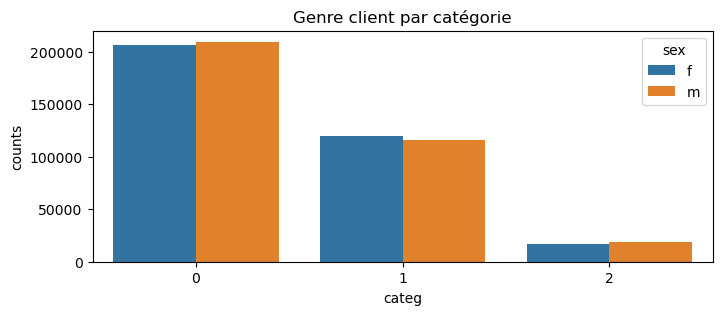

In [70]:
# Gender/category correlation

plt.figure(figsize=(8,3))
sns.barplot(data=genrer_categ, x='categ', y='counts', hue='sex')
plt.title('Genre client par catégorie')
plt.show()

In [71]:
# Questioning: Does gender have an impact on the categories purchased?

# H0: The distribution of purchases by category is the same depending on gender, the samples are independent.

# H1: the distribution of purchases is different, the samples are dependent.



In [72]:
X = "sex"
Y = "categ"
Z = "counts"

cont = genrer_categ[[X,Y,Z]].pivot_table(index=X,columns=Y,values=Z,aggfunc='sum',margins=True,margins_name='Total')
cont_t = genrer_categ[[X,Y,Z]].pivot_table(index=X,columns=Y,values=Z,aggfunc='sum')
cont

categ,0,1,2,Total
sex,,,,
f,206103,119307,17283,342693
m,209356,116285,19200,344841
Total,415459,235592,36483,687534


In [73]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont_t)
print(st_p)
print(st_exp)

4.320582228399707e-35
[[207080.50959953 117427.98066132  18184.50973915]
 [208378.49040047 118164.01933868  18298.49026085]]


In [74]:
print(st_chi2)
print(st_dof)

158.25417617304882
2


In [75]:
# H0 is retained, the samples are independent p < chi2

# Less than 0.05 therefore significant

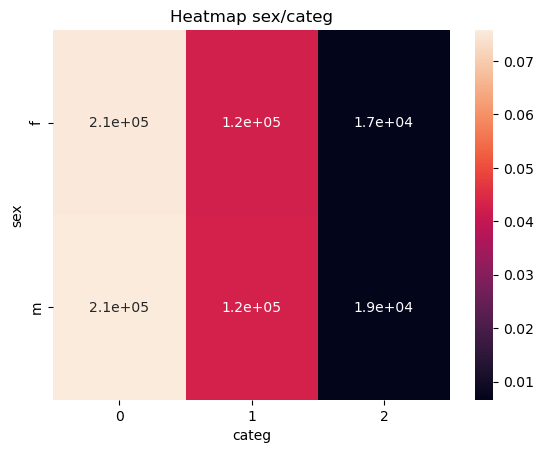

In [76]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(genrer_categ)
indep = tx.dot(ty) / n

c = cont.fillna(0) 
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Heatmap sex/categ')
plt.show()

2 - Two quantitative variables Pearson

In [77]:
# Pearson test quantity quantity



In [78]:
# Creation of the supplement table for quantity/quantity analyses

In [79]:
agement_p = data.groupby('age').agg({'price':sum}).reset_index()

In [80]:
achat_p_age = data.groupby('age').size().reset_index(name='n_achats')

In [81]:
client_p_age = data.groupby('age')['client_id'].nunique().reset_index(name='n_clients')

In [82]:
compact_d = achat_p_age.merge(client_p_age, how='inner', on='age')

In [83]:
compact_d['frequence']= compact_d['n_achats']/compact_d['n_clients']/24

In [84]:
session_p_age = data.groupby('age')['session_id'].nunique().reset_index(name='n_session')

In [85]:
complement = compact_d.merge(session_p_age, how='inner', on='age')

In [86]:
complement_f = complement.merge(agement_p, how='inner', on='age')

In [87]:
complement_f['taille_p_moy'] = complement_f['n_achats']/complement_f['n_session']
complement_f['value_p_moy'] = complement_f['price']/complement_f['n_achats']

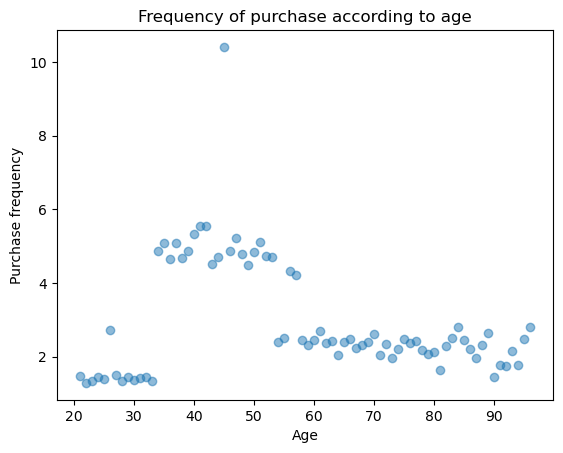

In [139]:
plt.plot(complement_f["age"],complement_f["frequence"],'o',alpha=0.5)
plt.ylabel("Purchase frequency")
plt.xlabel("Age")
plt.title("Frequency of purchase according to age")
plt.show()

In [89]:
# We can hypothesize that the younger the customer, the greater his purchase frequency
# To verify this hypothesis, we can set up a Pearson test while using a linear regression line facing a scatterplot of quantity/quantity data

In [90]:
Y = complement_f['frequence']
X = complement_f[['age']]
X = X.copy() # We will modify X, so we create a copy of it
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square 
a,b = result.params['age'],result.params['intercept']

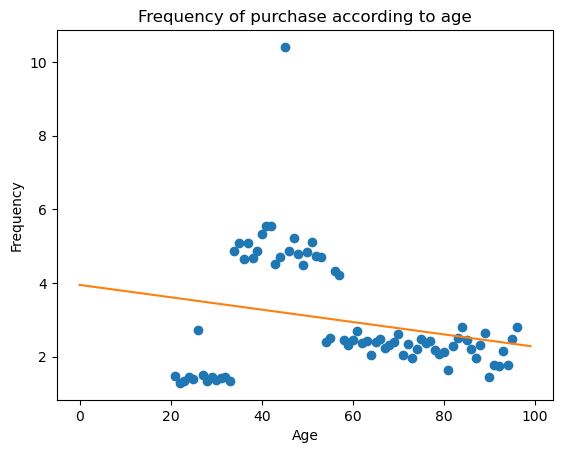

In [143]:
plt.plot(complement_f.age,complement_f.frequence, "o")
plt.plot(np.arange(100),[a*x+b for x in np.arange(100)])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Frequency of purchase according to age")
plt.show()

In [92]:
print(st.pearsonr(complement_f["age"],complement_f["frequence"])[0])

-0.2353328389386469


In [93]:
# Low correlation close to 0

In [94]:
#Age has a slight influence on purchase frequency

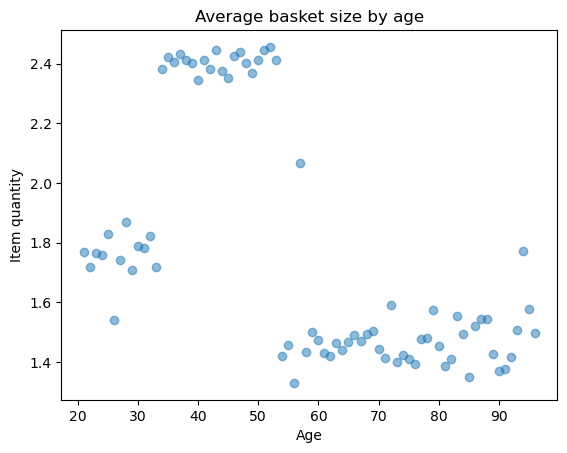

In [140]:
plt.plot(complement_f["age"],complement_f["taille_p_moy"],'o',alpha=0.5)
plt.ylabel("Item quantity")
plt.xlabel("Age")
plt.title("Average basket size by age")
plt.show()

In [96]:
# We can hypothesize that the younger the customer, the larger their average basket
# To verify this hypothesis, we can set up a Pearson test against a scatterplot of quantity/quantity data

In [97]:
E = complement_f['taille_p_moy']
F = complement_f[['age']]
F = F.copy() # We will modify X, so we create a copy of it
F['intercept'] = 1.
result = sm.OLS(E, F).fit() # OLS = Ordinary Least Square 
k,l = result.params['age'],result.params['intercept']

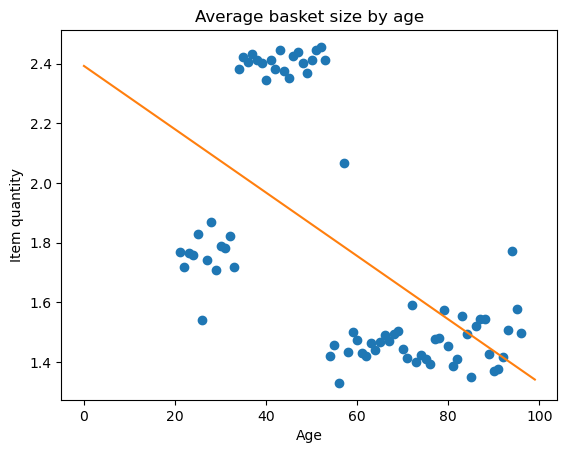

In [141]:
plt.plot(complement_f.age,complement_f.taille_p_moy, "o")
plt.plot(np.arange(100),[k*x+l for x in np.arange(100)])
plt.xlabel("Age")
plt.ylabel("Item quantity")
plt.title("Average basket size by age")
plt.show()

In [99]:
[np.var(x, ddof=1) for x in [complement_f['age'],complement_f['price'], complement_f['taille_p_moy'], complement_f['frequence']]]

[487.6666666666667, 17646096657.873074, 0.16552675415178206, 2.482630525265986]

In [100]:
print(st.pearsonr(complement_f["age"],complement_f["taille_p_moy"])[0])

-0.5764684984050898


In [101]:
# Average correlation between 0 and -1

In [102]:
#Age has a moderate influence on the size of the average basket

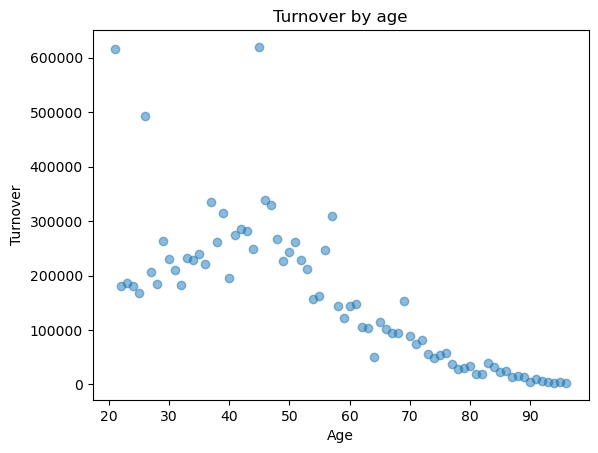

In [142]:
plt.plot(complement_f["age"],complement_f["price"],'o',alpha=0.5)
plt.ylabel("Turnover")
plt.xlabel("Age")
plt.title("Turnover by age")
plt.show()

In [104]:
# We can hypothesize that the younger the customer, the higher his turnover
# To verify this hypothesis, we can set up a Pearson test facing a scatterplot of quantity/quantity data

In [105]:
I = complement_f['price']
J = complement_f[['age']]
J = J.copy() # We will modify X, so we create a copy of it
J['intercept'] = 1.
result = sm.OLS(I, J).fit() # OLS = Ordinary Least Square 
n,m = result.params['age'],result.params['intercept']

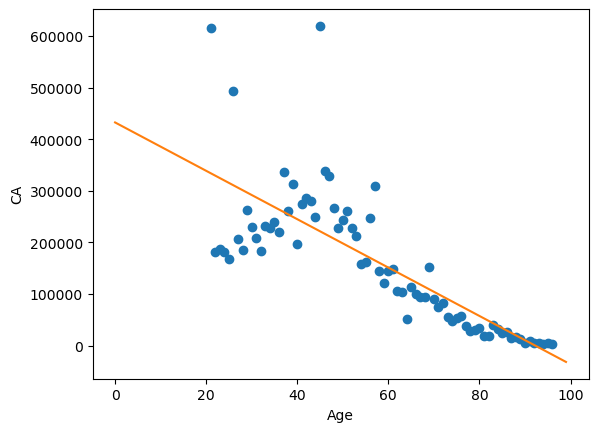

In [106]:
plt.plot(complement_f.age,complement_f.price, "o")
plt.plot(np.arange(100),[n*x+m for x in np.arange(100)])
plt.xlabel("Age")
plt.ylabel("CA")
plt.show()

In [107]:
print(st.pearsonr(complement_f["age"],complement_f["price"])[0])

-0.7796292816296744


In [108]:
# Strong correlation close to -1

In [109]:
# Age has a significant influence on turnover

3 - A qualitative variable and a quantitative variable Anova?

In [110]:
# Age/category correlation with anova test

age_categ = data.groupby(['age', 'categ']).size().reset_index(name='counts')
age_categ

,age,categ,counts
0,21,0,3418
1,21,1,6067
2,21,2,6012
3,22,0,909
4,22,1,1798
...,...,...,...
223,95,1,161
224,95,2,2
225,96,0,78
226,96,1,123


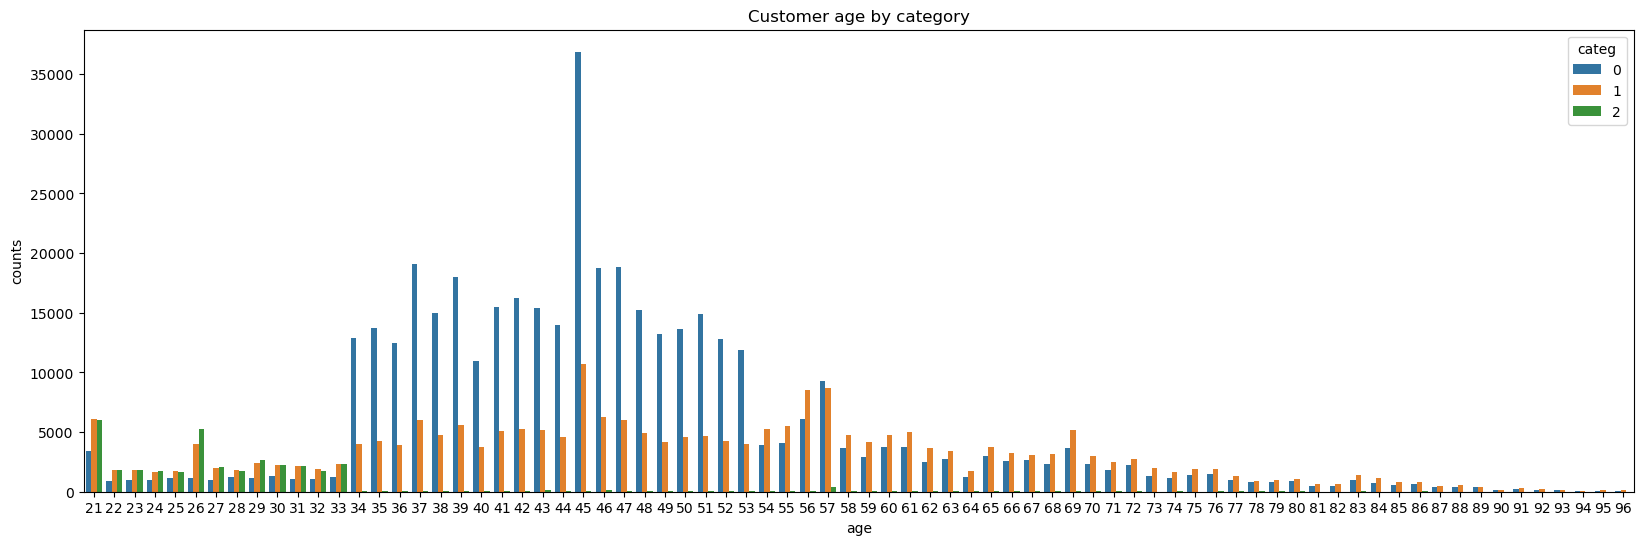

In [144]:
# Age/category correlation

plt.figure(figsize=(20,6))
sns.barplot(data=age_categ, x='age', y='counts', hue='categ')
plt.title('Customer age by category')
plt.show()

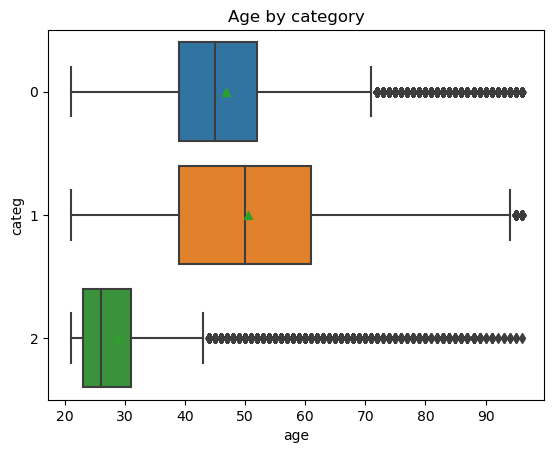

In [145]:
sns.boxplot(data=data, x='age', y='categ', orient='h', showfliers=True, showmeans=True)
plt.title('Age by category')
plt.show()

In [113]:
# The hypothesis is that age and category are strongly correlated, younger C2, average C0 and C1 all age groups

# Reject the null hypothesis H0 of equality of means

# H1 they differ

# Student/t test <2 categ

# There are 3 categories, so we must potentially use anova

# We must compare the variance between groups

# Analysis of variance

# Total variation, inter and intragroup


In [114]:
#The Kolmogorov-Smirnov test allows to verify the normal distribution of each category

# H0: The sample follows normal distribution p>0.05
# H1: not normal p<0.05

In [115]:
age_categ_U = age_categ[age_categ['categ'] == 1]
age_categ_D = age_categ[age_categ['categ'] == 2]
age_categ_Z = age_categ[age_categ['categ'] == 0]

In [116]:
# We note that no distribution follows a normal law in terms of their p-value, the distribution of the medians on both sides is not equal

In [117]:
test_stat_zero =kstest(age_categ_Z['age'],age_categ_Z['counts'], 'norm')
test_stat_zero

KstestResult(statistic=0.9605263157894737, pvalue=3.1111949565369965e-39, statistic_location=96, statistic_sign=1)

In [118]:
test_stat_un =kstest(age_categ_U['age'],age_categ_U['counts'], 'norm')
test_stat_un

KstestResult(statistic=0.9868421052631579, pvalue=8.241576043806612e-43, statistic_location=96, statistic_sign=1)

In [119]:
test_stat_deux =kstest(age_categ_D['age'],age_categ_D['counts'], 'norm')
test_stat_deux

KstestResult(statistic=0.25, pvalue=0.016983902217881437, statistic_location=96, statistic_sign=1)

In [120]:
# Variance of different categories

In [121]:
[np.var(x, ddof=1) for x in [age_categ_Z['counts'], age_categ_U['counts'], age_categ_D['counts']]]

[49498721.60894736, 4928905.908771929, 1216658.3850877204]

In [122]:
# Levene's test is used to check the equivalence of variance between the different categories (mean sum difference)

In [123]:
st.levene(age_categ_Z['counts'],age_categ_U['counts'],age_categ_D['counts'])

LeveneResult(statistic=24.53778333018194, pvalue=2.2915123848228172e-10)

In [124]:
#The low pvalue suggests that the variance of the different categories is not equal

In [125]:
#The Kruskal test is a non-parametric test that is used in particular when anova does not meet all the conditions with 2+ categ

# H0: the median of each group is equal p>0.05 // dependent
# H1: it is not p<0.05 // independent

In [126]:
st.kruskal(age_categ_Z['counts'],age_categ_U['counts'],age_categ_D['counts'])

KruskalResult(statistic=102.24837814921302, pvalue=6.266813829084025e-23)

In [127]:
# p<0.05 There is no real correlation between age and the category of books purchased, we cannot determine based on that alone

In [128]:
# The eta square gives an additional interpretation to the result

In [129]:
X = "categ" # qualitative
Y = "age" # quantitative

sous_echantillon = data[data["age"] > 0]

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.11602394898416378

In [130]:
# Significant